Lambda School Data Science

*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community: 

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction. 

:snake: 

To get the sprint environment setup: 

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab. 
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :) 
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen. 

In [1]:
# this is a test

# Tokenze Text (Learn)
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

In [2]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

In [3]:
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character
note: by default, if you run a string through a list it seperates each carachter

In [4]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


In [5]:
print(len(tokens))

47


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

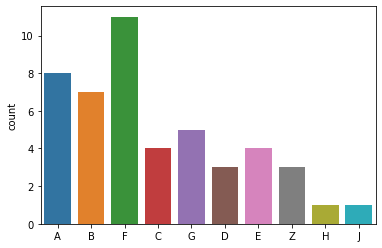

In [6]:
sns.countplot(tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### Tokenizing with Pure Python

In [7]:
sample = "Friends, Romans, countrymen, lend me your ears;"

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [8]:
sample.split(" ")

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [9]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [10]:
# Notice anything odd here? 
df['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [11]:
# Much cleaner
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctuation, whitespace, and other notation. This one is little bit more complicated than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z 0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [12]:
sample = sample+" 911"
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [13]:
re.sub('[^a-zA-Z 0-9]', '', sample)

'Friends Romans countrymen lend me your ears 911'

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [14]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [15]:
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

## Follow Along

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following: 

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [16]:
# How can we count the raw text?
df['reviews.text'].value_counts(normalize=True)[:50]

good                0.002118
great               0.001729
Good                0.001482
Great               0.001341
ok                  0.001165
Great price         0.001059
great price         0.000988
Excellent           0.000988
Great value         0.000953
good price          0.000812
great value         0.000777
Great price!        0.000635
good value          0.000600
good deal           0.000565
Great value.        0.000565
Great product       0.000529
As expected         0.000529
Good deal           0.000529
Great deal          0.000529
OK                  0.000529
Good batteries      0.000494
Good value          0.000494
great deal          0.000459
So far so good      0.000459
Great value!        0.000459
Great batteries.    0.000459
Good price          0.000459
Work great          0.000424
Good buy            0.000424
Great price.        0.000388
Great!              0.000388
As described        0.000388
very good           0.000388
Great deal!         0.000388
Good value.   

In [17]:
df['base_tokens'] = df['reviews.text'].apply(tokenize)
df['base_tokens'].head()

0    [i, order, 3, of, them, and, one, of, the, ite...
1    [bulk, is, always, the, less, expensive, way, ...
2    [well, they, are, not, duracell, but, for, the...
3    [seem, to, work, as, well, as, name, brand, ba...
4    [these, batteries, are, very, long, lasting, t...
Name: base_tokens, dtype: object

In [18]:
df[['reviews.text', 'base_tokens']][:10]

,reviews.text,base_tokens
0,I order 3 of them and one of the item is bad q...,"[i, order, 3, of, them, and, one, of, the, ite..."
1,Bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ..."
2,Well they are not Duracell but for the price i...,"[well, they, are, not, duracell, but, for, the..."
3,Seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba..."
4,These batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t..."
5,Bought a lot of batteries for Christmas and th...,"[bought, a, lot, of, batteries, for, christmas..."
6,ive not had any problame with these batteries ...,"[ive, not, had, any, problame, with, these, ba..."
7,Well if you are looking for cheap non-recharge...,"[well, if, you, are, looking, for, cheap, nonr..."
8,These do not hold the amount of high power jui...,"[these, do, not, hold, the, amount, of, high, ..."
9,AmazonBasics AA AAA batteries have done well b...,"[amazonbasics, aa, aaa, batteries, have, done,..."


In [19]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [20]:
df = df[df['primaryCategories'] == 'Electronics'].copy()
df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,base_tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."


#### Analyzing Tokens

In [21]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['base_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 17723),
 ('and', 14005),
 ('it', 13113),
 ('to', 12750),
 ('for', 12224),
 ('i', 12037),
 ('a', 10494),
 ('is', 8508),
 ('this', 8109),
 ('my', 7914)]

Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

In [22]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter() # appears in will only count occurances, not total count

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc)) # set makes it occurances (oh many reviews contained a word)

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [23]:
# Use the Function
wc = count(df['base_tokens'])
print(wc.shape)
wc.head()

(8986, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,the,7809,17723,1.0,0.041211,0.041211,0.557985
40,and,8543,14005,2.0,0.032565,0.073776,0.610432
4,it,7490,13113,3.0,0.030491,0.104267,0.535191
16,to,7137,12750,4.0,0.029647,0.133914,0.509968
49,for,7990,12224,5.0,0.028424,0.162339,0.570918


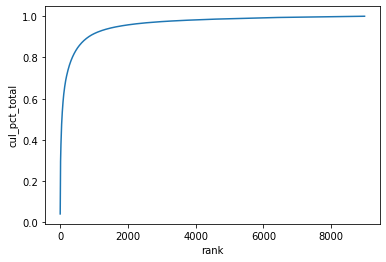

In [24]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [25]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.6130405666212466

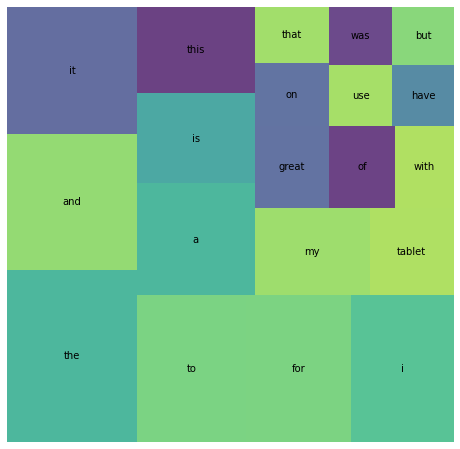

In [26]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [27]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [28]:
x = nlp('The cate ate the food, and the dog was sad')

In [29]:
dir(x)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_byte

In [30]:
# Print out list of tokens
sample = "Friends, Romans, countrymen, lend me your ears;"
[token.text for token in tokenizer(sample)]

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [31]:
# Make them tokens using the Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['spaCy_tokens'] = tokens
df['spaCy_tokens'].head()

8343    [Great, case, to, keep, everything, in, its, p...
8344    [After, discarding, and, getting, rid, of, bro...
8345    [A, few, dollars, more,, but, I, am, boycottin...
8346    [My, initial, impression, of, this, was, very,...
8347    [Pros:, Standard, Echo., Cons:, Older, generat...
Name: spaCy_tokens, dtype: object

In [32]:
wc = count(df['spaCy_tokens'])
print(wc.shape)
wc.head()

(16874, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
26,the,7230,15157,1.0,0.035131,0.035131,0.516613
47,and,8438,13734,2.0,0.031832,0.066963,0.602930
16,to,7090,12621,3.0,0.029253,0.096216,0.506610
56,for,7811,11753,4.0,0.027241,0.123457,0.558128
110,I,5846,11554,5.0,0.026780,0.150237,0.417721


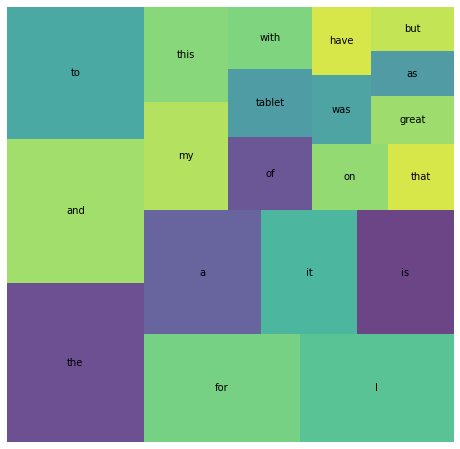

In [33]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens. 

# Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

## Follow Along 

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [34]:
# Spacy's Default Stop Words
# Bruno claims this is not recommended at work
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [35]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['spaCy_tokens_v2'] = tokens
df['spaCy_tokens_v2'].head()

8343    [great, case, place!, husband, love, it!!!!, h...
8344    [discarding, getting, rid, broken, cd, cases,,...
8345                 [dollars, more,, boycotting, amazon]
8346    [initial, impression, good., material, nicer, ...
8347    [pros:, standard, echo., cons:, older, generat...
Name: spaCy_tokens_v2, dtype: object

In [36]:
wc = count(df['spaCy_tokens_v2'])
print(wc.shape)
wc.head()

(14433, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,great,3620,4181,1.0,0.020201,0.020201,0.258664
1511,tablet,3463,4176,2.0,0.020177,0.040378,0.247446
2,love,2234,2465,3.0,0.011910,0.052289,0.159628
1233,bought,2194,2327,4.0,0.011243,0.063532,0.156770
83,easy,2107,2275,5.0,0.010992,0.074524,0.150554


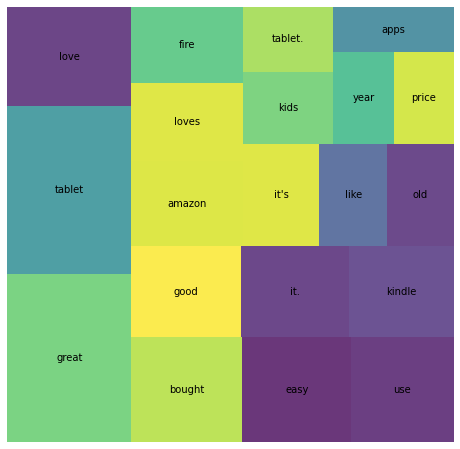

In [37]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Extending Stop Words

In [38]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [39]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'Amazon',
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazon',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'batteries',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'for

In [40]:
tokens = []
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['spaCy_tokens_v3'] = tokens

In [41]:
wc = count(df['spaCy_tokens_v3'])
print(wc.shape)
wc.head()

(14429, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,great,3620,4181,1.0,0.020749,0.020749,0.258664
1508,tablet,3463,4176,2.0,0.020725,0.041474,0.247446
2,love,2234,2465,3.0,0.012233,0.053707,0.159628
1230,bought,2194,2327,4.0,0.011548,0.065256,0.156770
82,easy,2107,2275,5.0,0.011290,0.076546,0.150554


In [42]:
# To make this comparison more interesting, let's compare: All Amazon Reviews, Fire HD 8 only, and Kindle only
df['FireHD_8'] = df['name'].str.contains('fire hd 8', case=False)
df['Kindle'] = df['name'].str.contains('kindle', case=False)

(14429, 7) (8929, 7) (3908, 7)


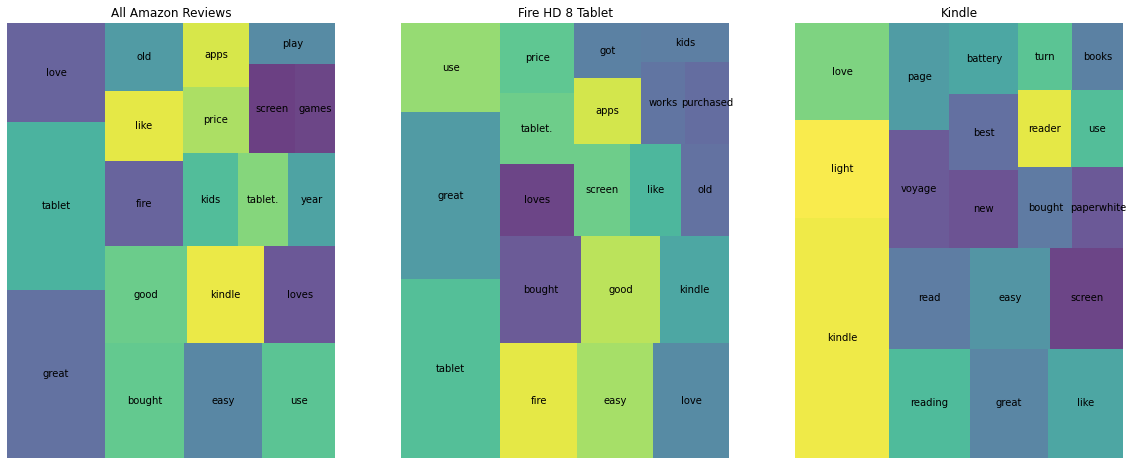

In [43]:
# Use the Function for all reviews, Fire HD 8 only, and Kindle only
wc = count(df['spaCy_tokens_v3'])
wc_fire_hd_8 = count(df[df['FireHD_8'] == 1]['spaCy_tokens_v3'])
wc_kindle = count(df[df['Kindle'] == 1]['spaCy_tokens_v3'])
print(wc.shape, wc_fire_hd_8.shape, wc_kindle.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_fire_top20 = wc_fire_hd_8[wc_fire_hd_8['rank'] <= 20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Amazon Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Fire HD 8 Tablet')
squarify.plot(sizes=wc_fire_top20['pct_total'], label=wc_fire_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Kindle')
squarify.plot(sizes=wc_kindle_top20['pct_total'], label=wc_kindle_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [44]:
df['reviews.rating'].value_counts()

5    9371
4    3703
3     551
1     187
2     183
Name: reviews.rating, dtype: int64

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

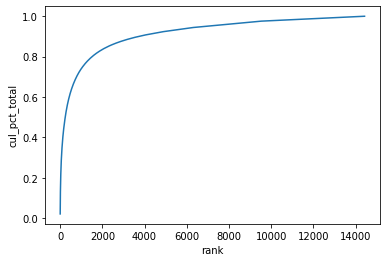

In [45]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent. 
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

In [46]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14409,say..............................................,1,1,14410.0,0.000005,0.999906,0.000071
14410,kindlelishous!!!!!!!!!!!!!,1,1,14411.0,0.000005,0.999911,0.000071
14411,"competent,",1,1,14412.0,0.000005,0.999916,0.000071
14412,"3-year-old,",1,1,14413.0,0.000005,0.999921,0.000071
14413,objective,1,1,14414.0,0.000005,0.999926,0.000071
14414,dollars.my,1,1,14415.0,0.000005,0.999931,0.000071
14416,relies,1,1,14416.0,0.000005,0.999935,0.000071
14415,gps.,1,1,14417.0,0.000005,0.999940,0.000071
14417,"readi,g",1,1,14418.0,0.000005,0.999945,0.000071
14423,perfectly..great,1,1,14419.0,0.000005,0.999950,0.000071


In [47]:
wc['appears_in_pct'].describe()

count    14429.000000
mean         0.000943
std          0.005583
min          0.000071
25%          0.000071
50%          0.000143
75%          0.000357
max          0.258664
Name: appears_in_pct, dtype: float64

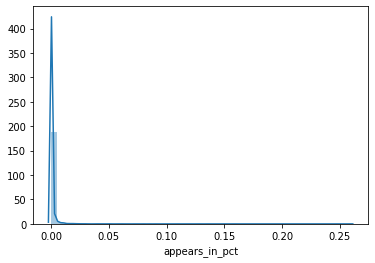

In [48]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

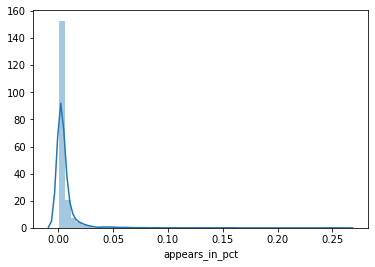

In [49]:
# Tree-Map w/ Words that appear in a least 0.1% of documents. 
wc = wc[wc['appears_in_pct'] >= 0.001]
sns.distplot(wc['appears_in_pct']);

In [50]:
wc.shape

(1812, 7)

In [51]:
wc.tail(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7318,upload,14,14,1835.0,0.000069,0.825062,0.001
7684,education,14,14,1837.0,0.000069,0.825201,0.001
7892,washington,14,14,1839.0,0.000069,0.825340,0.001
8060,randomly,14,14,1840.0,0.000069,0.825409,0.001
8059,unwanted,14,14,1841.0,0.000069,0.825479,0.001


## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming. 

# Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 

In [52]:
ps = PorterStemmer()

words = ["python", "pythoner", "pythoning", "pythoned", "pythonly", "wolves"]
for word in words:
    print(ps.stem(word))

python
python
python
python
pythonli
wolv


### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [53]:
# Leverage tqdm for progress_apply to show your progress - always use!
from tqdm import tqdm
tqdm.pandas()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [54]:
# Put in a new column `stems`
df['stems'] = df.base_tokens.progress_apply(lambda x: [ps.stem(word) for word in x if word not in STOP_WORDS])
df.head(1)

100%|██████████| 13995/13995 [00:03<00:00, 3641.56it/s]


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.title,reviews.username,sourceURLs,base_tokens,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3,FireHD_8,Kindle,stems
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p...","[Great, case, to, keep, everything, in, its, p...","[great, case, place!, husband, love, it!!!!, h...","[great, case, place!, husband, love, it!!!!, h...",False,False,"[great, case, place, husband, love, hold, lot,..."


In [55]:
wc = count(df['stems'])
print(wc.shape)
wc.head()

(6472, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
713,tablet,4875,6439,1.0,0.033259,0.033259,0.348339
2,great,4115,4829,2.0,0.024943,0.058203,0.294034
1,love,4119,4646,3.0,0.023998,0.082201,0.294319
248,use,3005,3432,4.0,0.017727,0.099928,0.214720
1017,kindl,1958,2522,5.0,0.013027,0.112955,0.139907


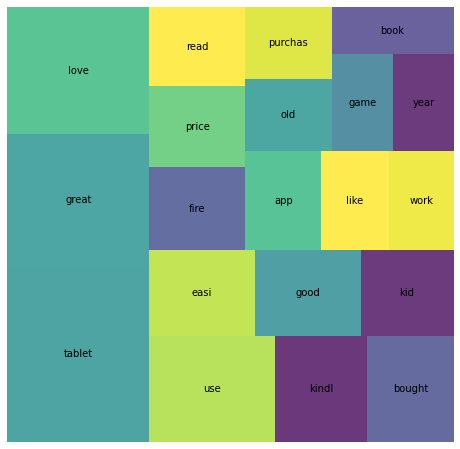

In [56]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [57]:
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [58]:
# Wrap it all in a function
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [59]:
df['lemmas'] = df['reviews.text'].progress_apply(get_lemmas)
df['lemmas'].head()

100%|██████████| 13995/13995 [02:17<00:00, 101.54it/s]


8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, Standard, Echo, con, old, generation, Ec...
Name: lemmas, dtype: object

In [60]:
wc = count(df['lemmas'])
print(wc.shape)
wc.head()

(6832, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
705,tablet,4835,6372,1.0,0.032866,0.032866,0.345481
2,great,4148,4880,2.0,0.025170,0.058036,0.296392
1,love,4127,4650,3.0,0.023984,0.082020,0.294891
239,use,2985,3397,4.0,0.017521,0.099541,0.213290
235,buy,2872,3274,5.0,0.016887,0.116428,0.205216


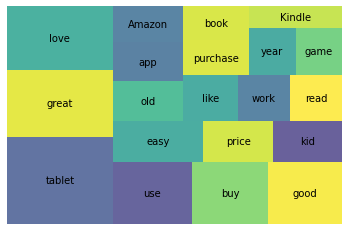

In [61]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text. 

## Extra Material (if time permits)

Go to terminal:
- conda activate U4-S1-NLP
- conda install -c conda-forge textblob

Good reference article: https://planspace.org/20150607-textblob_sentiment/

In [62]:
sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [63]:
from textblob import TextBlob

# Sentiment analysis (or opinion mining) attempts to determine if a text is objective or subjective, positive or negative.
# The sentiment analysis lexicon bundled in Pattern focuses on adjectives.
# It contains adjectives that occur frequently in customer reviews, hand-tagged with values for polarity and subjectivity.

# Calculate sentiment
TextBlob("Textblob makes it simple and easy to calculate sentiment").sentiment

ModuleNotFoundError: No module named 'textblob'

In [ ]:
sentence = df['reviews.text'].iloc[0]
print(sentence)
TextBlob(sentence).sentiment

In [ ]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
})

In [ ]:
# Spelling correction
TextBlob("Textblob also makes it simple and esy to corectt speling").correct()

## Scattertext Kindle vs. FireHD Comparison

To run this section, go to your terminal and execute: 

- pip install scattertext

In [ ]:
# Create a copy and add column with product tags
subset_df = df.copy()
subset_df.loc[subset_df['name'].str.contains('kindle', case=False), 'product'] = 'Kindle'
subset_df.loc[subset_df['name'].str.contains('fire hd 8', case=False), 'product'] = 'Fire HD 8'

# Drop Review that aren't Kindle/Fire HD 8
subset_df.dropna(subset=['product'], inplace=True)

# Confirm shape and distribution of reviews
print(subset_df.shape)
subset_df['product'].value_counts()

In [ ]:
import scattertext as st

corpus = st.CorpusFromPandas(subset_df, 
                             category_col='product', 
                             text_col='reviews.text',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='Kindle',
    category_name='Kindle',
    not_category_name='Fire HD 8',
    width_in_pixels=1000,
    metadata=subset_df['reviews.rating'])
open('./kindle_vs_firehd8.html', 'w').write(html)

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied. 

You will apply similar techniques to today's [module project assignment](LS_DS_411_Text_Data_Assignment.ipynb) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data. 

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)